In [1]:
%matplotlib inline

import pickle, os, glob
from EEG.info import info_exp

root = "C:\\eeg\\01exp\\"
name = "20161129_DBS_001"

In [2]:
def load(path,name):
    with open(path + '/' + name, 'rb') as input:
        data = pickle.load(input)
        return data

In [3]:
test = load(root + name,'exp_data_aligned.cls')

In [4]:
test.getinfo()

Experiment status:  True ; Num tests:  12
Align status:  True
Respondent name:  Иван Иванов
Description: Эксперимент с обратной связью
Labels_names: [ удалено, левое, правое, отдых ]
Frequency: 1000
Count train activities:  45
Count tests activities: [ 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30 ]
Time of activity: 4500
------------------------------------------------------------------
Chanels_names:
------------------------------------------------------------------
FC5        FT7        FC3        FCz        FC4        FT8       
T3         C3         Cz         T4         C4        
TP7        CP3        CPz        CP4        TP8       
FC1        FC2        FC6        P4         C5        
C1         C2         C6         P3         CP5       
CP1        CP2        CP6        POz       
------------------------------------------------------------------
List tests
------------------------------------------------------------------
20161129_173025 20161129_173919 20161129_174505
201

In [5]:
import numpy as np
import neo
import mne

class converter:
    def __init__(self,data):
        self.obj = data
        
    def get_mne_info(self):
        return mne.create_info(ch_names = self.obj.info.chanels_names, 
                               sfreq = self.obj.info.frequency,
                               ch_types = 'eeg', 
                               montage = 'standard_1005')
        
    pass
        

In [6]:
test2  = converter(test)

In [7]:
data = np.array(test.data['data_train'][0]) // 30 * 4500

In [8]:
raw = mne.io.RawArray(data, test2.get_mne_info())

Creating RawArray with float64 data, n_channels=30, n_times=4500
    Range : 0 ... 4499 =      0.000 ...     4.499 secs
Ready.


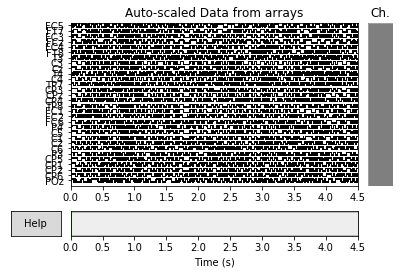

Effective window size : 2.048 (s)


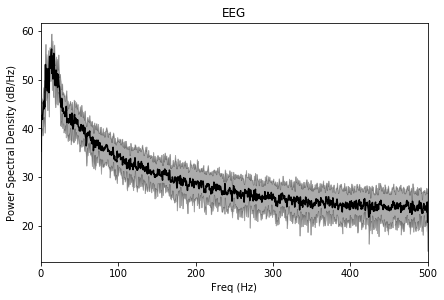

1


In [9]:
raw.plot(n_channels=30, scalings='auto', title='Auto-scaled Data from arrays',
         show=True, block=True)

raw.plot_psd(tmax=np.inf)

print '1'